Hunter Bennett | Glass Lab | Kupffer Strains Project | April 27 2021  

This series of notebooks is for manuscript preparation of "final" figures for import into Adobe Illustrator.

This notebook in particular prepares a panel showing that leptin treatment induces BALBcJ specific gene expression.

In [44]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
### imports ###
import sys
%matplotlib inline
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

# import custom functions
import sys
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df
from plotting_scripts import label_point, pca_rpkm_mat, get_diff_volcano, gene_list_bar_plot
from homer_preprocessing import read_annotated_peaks, import_homer_diffgene, pull_comparisons_get_diff

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
dataDirectory = '/home/h1bennet/strains_rna/results/K07_Strains_LPS2htoControl/'
workingDirectory = '/home/h1bennet/strains_rna/results/10_Strains_Manuscript_Prep/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

In [46]:
#### PLOTTING PARAMETERS FOR MANUSCRIPT ####
# # get matplotlib to save readable fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.size'] = 6
matplotlib.rcParams['savefig.dpi'] = 500

# line widths
matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['ytick.major.width'] = 1

# adjust defualt color for plots to black
# normal default is a dark gray
COLOR = 'black'
matplotlib.rcParams['text.color'] = COLOR
matplotlib.rcParams['axes.labelcolor'] = COLOR
matplotlib.rcParams['xtick.color'] = COLOR
matplotlib.rcParams['ytick.color'] = COLOR
matplotlib.rcParams['axes.edgecolor'] = COLOR

#### PLOT PARAMETERS FOR THIS PLOT ####

# Define plotting function

In [47]:
def gene_list_bar_plot_illus(genes, data, groups,
                             group_labels, colors, width=0.5,
                             spacing=0.0, title='', ylabel='', xlabel='',
                             xticklabels=[],
                             ax=None):
    '''This function allows for visualization of expression in qPCR style
    bar plots for multiple genes contained in an rpkm data file.
    
        Accepts:
            genes (str): list of geneIDs to plot
            data (pandas DataFrame): dataset in gene x sample format with geneIDs as index
            groups (int): groups of samples in the columns of data
            group_labels (str): labels of each group in groups
            colors (str) = colors of each group in groups
            width (float) = width of bars to plot, default 0.5
            spacing (float) = extra spacing between bars to plot, default 0.0
            relative (bool) = whether to standardize plot so that first group mean is 1,
            ax (matplotlib.Axes object) = plot axis
        
        Returns:
            ax (matplotlib.Axes object) = gene list bar plot'''

    import pandas as pd
    import matplotlib.pyplot as plt    
    import numpy as np

    # calculate means and standard deviations for plotting
    # adjust if using a relative method (control group set to 1)
    # get mean and std
    means = []
    stds = []
    for (group, label) in zip(groups, group_labels):
        means.append(data.iloc[:, group].reindex(genes).mean(1))
        stds.append(data.iloc[:, group].reindex(genes).std(1))
    
    # set axis
    if ax==None:
        ax = plt.gca()
    

    # plot
    ind = np.arange(len(genes))
    ind = np.arange(len(genes))    # the x locations for the groups
    i = 0
    for mean, std, group, label, color in zip(means, stds, groups, group_labels, colors):
        ax.bar(ind + (width+spacing)*i,
               mean,
               width,
               color=color,
               yerr=[np.zeros(len(std)), std],
               edgecolor='k',
               linewidth=1,
               capsize=20,
               error_kw={'elinewidth':1,
                         'capthick':1,
                         'capsize':4},
               label=label)
        i+=1
        
    if len(xticklabels) > 0:
        ax.set_xticks([ind + (width+spacing)*i for i in np.arange(len(xticklabels))]);
        ax.set_xticklabels(xticklabels);
    ax.legend(fontsize=10);
    ax.set_ylabel(ylabel, fontsize=8)
    ax.set_xlabel(xlabel, fontsize=8)
    ax.set_title(title, fontsize=8)
    
    return ax

In [48]:
np.arange(0,len(['a','b','c']))

array([0, 1, 2])

# Make folder for figures

In [49]:
if not os.path.isdir('./lps_treatment_rna_bar_plots/'):
    os.mkdir('./lps_treatment_rna_bar_plots/')

# Import RNA-seq data

In [50]:
pval = 0.05
log2fc = np.log2(2)

Read in data from experiment

In [51]:
de, tpm, tpm_mat, tpm_mat_quant = import_homer_diffgene(
    dataDirectory+'/differential/balbc_kupffer_control.vs.balbc_kupffer_lps_2hours.scatter.homer.txt',
    dataDirectory+'/expression/HOMER.rawTPM.txt',
    gene_name_index=True)

ge all transcripts (24940, 14)
Diff Gene selected transcripts (9132, 14)
ge selected transcripts (9132, 14)


In [52]:
gene_list_dict = {}
for i in np.sort(glob.glob(dataDirectory+'/differential/balb*balb*homer.txt')):
    print(i)
    # read in gene expression data
    df, tpm, tpm_mat, tpm_mat_quant = import_homer_diffgene(
        depath=i,
        gepath=dataDirectory+'/expression/HOMER.rawTPM.txt',
        gene_name_index=True)

    # select differential genes
    df = df.loc[~(df.chr.str.contains('chrX|chrY|ChrUn')), :]
    sig_genes = df.index[(df['padj'] < pval) & (df['log2FoldChange'] >= log2fc)].to_list()
    gene_list_dict[i.split('.')[2]+'_up'] = list(sig_genes)
    # print('union set length:', print(len(g_union)))
    # print('intersection set length:', print(len(g_intersect)))
    

/home/h1bennet/strains_rna/results/K07_Strains_LPS2htoControl//differential/balbc_kupffer_control.vs.balbc_kupffer_lps_2hours.scatter.homer.txt
ge all transcripts (24940, 14)
Diff Gene selected transcripts (9132, 14)
ge selected transcripts (9132, 14)
/home/h1bennet/strains_rna/results/K07_Strains_LPS2htoControl//differential/balbc_kupffer_lps_2hours.vs.balbc_kupffer_control.scatter.homer.txt
ge all transcripts (24940, 14)
Diff Gene selected transcripts (9132, 14)
ge selected transcripts (9132, 14)


In [53]:
gene_list_dict.keys()

dict_keys(['balbc_kupffer_lps_2hours_up', 'balbc_kupffer_control_up'])

In [54]:
with open('/home/h1bennet/strains_rna/results/K03_CB6F1_Kupffer_RNA/gene_lists/cb6f1_kupffer_trans_c57_filt.txt', 'r') as f:
    c57_trans = [i.strip() for i in f.readlines()[1:]]

In [55]:
print(len(gene_list_dict['balbc_kupffer_lps_2hours_up']), 'genes up in Balb KC + LPS')
print(len(c57_trans), 'C57 trans regulated genes')
print(len(set(gene_list_dict['balbc_kupffer_lps_2hours_up']).intersection(c57_trans)), 'shared')

1407 genes up in Balb KC + LPS
66 C57 trans regulated genes
29 shared


In [56]:
np.sort(list(set(gene_list_dict['balbc_kupffer_lps_2hours_up']).intersection(c57_trans)))

array(['Aoah', 'Batf3', 'C4b', 'Cd40', 'Cd74', 'Cfb', 'Cyp4a10',
       'Cyp4a14', 'Gc', 'H2-Aa', 'H2-Ab1', 'H2-DMb1', 'H2-Eb1', 'H2-Q7',
       'H2-Q9', 'Ikbke', 'Irak3', 'Lbp', 'Marco', 'Mmp14', 'Pde4b',
       'Pim1', 'Plbd1', 'Pot1b', 'Procr', 'Serpina3g', 'Serpina3k', 'Tnf',
       'Tnfaip3'], dtype='<U9')

In [57]:
with open('/home/h1bennet/strains_rna/results/K03_CB6F1_Kupffer_RNA/gene_lists/cb6f1_kupffer_trans_c57_filt_pval.txt', 'r') as f:
    c57_trans = [i.strip() for i in f.readlines()[1:]]

In [92]:
with open('/home/h1bennet/strains_rna/results/K03_NSG_Kupffer_RNA/gene_lists/cb6f1_kupffer_trans_c57_filt_pval.txt', 'r') as f:
    c57_nsg_trans = [i.strip() for i in f.readlines()[1:]]

In [58]:
print(len(gene_list_dict['balbc_kupffer_lps_2hours_up']), 'genes up in Balb KC + LPS')
print(len(c57_trans), 'C57 trans regulated genes')
print(len(set(gene_list_dict['balbc_kupffer_lps_2hours_up']).intersection(c57_trans)), 'shared')

1407 genes up in Balb KC + LPS
61 C57 trans regulated genes
26 shared


In [59]:
np.sort(list(set(gene_list_dict['balbc_kupffer_lps_2hours_up']).intersection(c57_trans)))

array(['4930503L19Rik', 'Aoah', 'Batf3', 'C4b', 'Cd40', 'Cd74', 'Cfb',
       'Ddhd1', 'Fam219a', 'H2-Aa', 'H2-Ab1', 'H2-DMb1', 'H2-Eb1',
       'H2-Q7', 'H2-Q9', 'Ikbke', 'Lbp', 'Marco', 'Mmp14', 'Pde4b',
       'Pim1', 'Plbd1', 'Pot1b', 'Procr', 'Rbbp8', 'Tnfaip3'],
      dtype='<U13')

In [60]:
groups = [[0,1],
          # [2],
          [3,4],
          [5,6]]

group_labels = ['C57BL/6J',
                # 'C57BL/6J Kupffer LPS 2 hours',
                'Balb/cJ',
                'Balb/cJ\n+LPS']

colors = ['#74c476',
          # '#006d2c',
          '#6baed6',
          '#08519c']

legend_elements = []
for lab, col in  zip(group_labels, colors):
    legend_elements.append(Patch(label=lab, color=col))

In [61]:
lps_induced_genes = ['Aoah', 'Batf3', 'Ikbke', 'Irak3', 'Marco', 'Mmp14', 'Pde4b', 'Tnf', 'Tnfaip3']

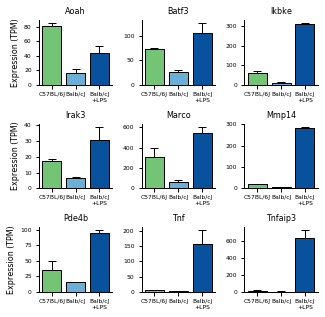

In [62]:
fig, axs = plt.subplots(3, 3, figsize=(5,5))
plt.subplots_adjust(wspace=0.4, hspace=0.6)


for gene, ax in zip(lps_induced_genes, axs.flat):
    gene_list_bar_plot_illus([gene],
                       tpm_mat,
                       groups=groups,
                       group_labels = group_labels,
                       colors = colors,
                       xticklabels=group_labels,
                       title=gene,
                       xlabel='',
                       ylabel='',
                       spacing=0.025,
                       width = 0.10,
                       ax=ax)
    
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.get_legend().remove()
    
axs[0][0].set_ylabel('Expression (TPM)');
axs[1][0].set_ylabel('Expression (TPM)');
axs[2][0].set_ylabel('Expression (TPM)');

plt.savefig('./lps_treatment_rna_bar_plots/balbcj_lps_treatment_c57_tans_genes.png',
            bbox_inches='tight')

## Can also try this as a heatmap of all C57 trans genes

In [84]:
tpm_mat = pd.read_csv(dataDirectory+'/expression/rawT.txt',
                      sep='\t',
                      index_col=0)

In [85]:
groups = [[0,1],
          [3,4],
          [5,6]]

cols = [i for j in groups for i in j]

group_labels = ['C57BL/6J',
                'Balb/cJ',
                'Balb/cJ\n+LPS']

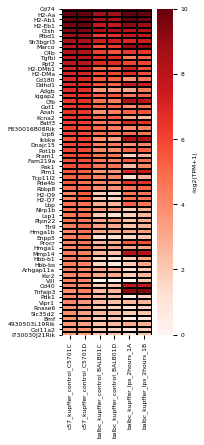

In [86]:
fig, ax = plt.subplots(figsize=(2,6))

# sort by average expression in C57
tmp_mat = np.log2(tpm_mat.loc[c57_trans, :].iloc[:, cols]+1).dropna()
tmp_mat.columns = tmp_mat.columns.str.split('/').str[-1].str.split('_HBENN').str[0]
tmp_mat['c57_mean'] = tmp_mat.iloc[:, groups[0]].mean(1)
tmp_mat = tmp_mat.sort_values('c57_mean', ascending=False)
tmp_mat = tmp_mat.drop(columns=['c57_mean'])

cm = sns.heatmap(
    tmp_mat,
    cmap='Reds',
    linewidths=1,
    linecolor='black',
    cbar=True,
    vmin=0,
    vmax=10,
    # annot=True,
    cbar_kws={'label': '-log2(TPM+1)'},
    ax=ax,
    xticklabels=1,
    yticklabels=1,
    square=False)

plt.savefig('./lps_treatment_rna_bar_plots/balbcj_lps_treatment_c57_tans_genes_heatmap_log2.png',
            bbox_inches='tight')

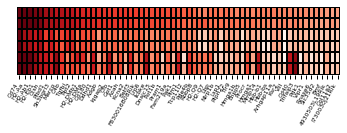

In [87]:
fig, ax = plt.subplots(figsize=(5.8,1.25))

# sort by average expression in C57
tmp_mat = np.log2(tpm_mat.loc[c57_trans, :].iloc[:, cols]+1).dropna()
tmp_mat.columns = tmp_mat.columns.str.split('/').str[-1].str.split('_HBENN').str[0]
tmp_mat['c57_mean'] = tmp_mat.iloc[:, groups[0]].mean(1)
tmp_mat = tmp_mat.sort_values('c57_mean', ascending=False)
tmp_mat = tmp_mat.drop(columns=['c57_mean'])

cm = sns.heatmap(
    tmp_mat.T,
    cmap='Reds',
    linewidths=1,
    linecolor='black',
    cbar=False,
    vmin=0,
    vmax=10,
    # annot=True,
    cbar_kws={'label': '-log2(TPM+1)',
              'pad':0.01},
    ax=ax,
    xticklabels=1,
    yticklabels=0,
    square=False)

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=60,
                   va='top',
                   ha='right');
ax.set_xlabel('')

plt.savefig('./lps_treatment_rna_bar_plots/balbcj_lps_treatment_c57_tans_genes_heatmap_log2_horizontal.pdf',
            bbox_inches='tight')

# try horizontal heatmap organized by LPS responsiveness

In [88]:
shared_set = (set(c57_trans).intersection(gene_list_dict['balbc_kupffer_lps_2hours_up']))
trans_not_lps = (set(c57_trans).difference(gene_list_dict['balbc_kupffer_lps_2hours_up']))

In [89]:
set_lengths[::-1]

[35, 26]

26
35


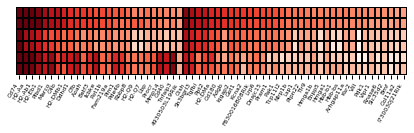

In [91]:
sets = [shared_set, trans_not_lps]
set_lengths = [len(i) for i in sets]

# sort by average expression in C57
fig, axs = plt.subplots(1, 2, figsize=(7,1.25), gridspec_kw={'width_ratios': set_lengths})
plt.subplots_adjust(wspace=0)

for geneset, ax in zip(sets, axs):
    tmp_mat = np.log2(tpm_mat.loc[geneset, :].iloc[:, cols]+1).dropna()
    print(tmp_mat.shape[0])
    # tmp_mat.columns = tmp_mat.columns.str.split('/').str[-1].str.split('_HBENN').str[0]
    tmp_mat['c57_mean'] = tmp_mat.iloc[:, groups[0]].mean(1)
    tmp_mat = tmp_mat.sort_values('c57_mean', ascending=False)
    tmp_mat = tmp_mat.drop(columns=['c57_mean'])
    cm = sns.heatmap(
        tmp_mat.T,
        cmap='Reds',
        linewidths=1,
        linecolor='black',
        cbar=False,
        vmin=0,
        vmax=10,
        # annot=True,
        cbar_kws={'label': '-log2(TPM+1)',
                  'pad':0.01},
        ax=ax,
        xticklabels=1,
        yticklabels=0,
        square=False)
    
    ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=60,
                   va='top',
                   ha='right');
    
    plt.savefig('./lps_treatment_rna_bar_plots/balbcj_lps_treatment_c57_tans_genes_heatmap_log2_horizontal_sorted.pdf',
            bbox_inches='tight')

# Make same plot with NSG

### Make Colorbar

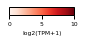

In [68]:
fig, ax = plt.subplots(figsize=(2,1))

cmap = matplotlib.cm.Reds
norm = matplotlib.colors.Normalize(vmin=0, vmax=10)
plt.gca().set_visible(False)
cb = fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm,  cmap=cmap),
                  use_gridspec=True,
                  orientation='horizontal',
                  label='log2(TPM+1)',
                  aspect=8)
plt.savefig('./lps_treatment_rna_bar_plots/colorbar.pdf',
            bbox_inches='tight')

## Also try as a z-scored heatmap

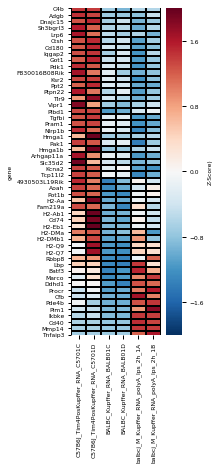

In [69]:
fig, ax = plt.subplots(figsize=(2,6))

# sort by average expression in C57
tmp_mat = tpm_mat.loc[c57_trans, :].iloc[:, cols].dropna()
tmp_mat.columns = tmp_mat.columns.str.split('/').str[-1].str.split('_HBENN').str[0]

# z-score by ligand
sd = np.std(tmp_mat, 1)
mean = np.mean(tmp_mat, 1)
z_frame = tmp_mat.subtract(mean, axis='rows').divide(sd, axis='rows')
# z_frame.columns = z_frame.columns.str.split('_').str[0]

z_frame['c57_mean'] = z_frame.iloc[:, groups[0]].mean(1)
z_frame = z_frame.sort_values('c57_mean', ascending=False)
z_frame = z_frame.drop(columns=['c57_mean'])

cm = sns.heatmap(z_frame,
    cmap='RdBu_r',
    linewidths=1,
    linecolor='black',
    cbar=True,
    vmin=-2,
    vmax=2,
    # annot=True,
    cbar_kws={'label': 'Z-Score)'},
    ax=ax,
    xticklabels=1,
    square=False)

plt.savefig('./lps_treatment_rna_bar_plots/balbcj_lps_treatment_c57_tans_genes_heatmap_zscore.png',
            bbox_inches='tight')